In [ ]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from urllib.request import urlopen

In [ ]:
# 참고 format() 사용하기
# 주소에서 바뀌는 부분 .format 중괄호 처리해서 반복문? or 업데이트 가능
url_sub = '/movie/sdb/rank/rmovie.nhn?sel={}&date={}'.format() 

In [ ]:
# 네이버 영화 평점 사이트 url 복사해서 붙이기
tot_url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200915'
url_base = 'https://movie.naver.com'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200915'

page = urlopen(url_base + url_sub)


In [ ]:
naver_movie_soup = BeautifulSoup(page, 'html.parser')

In [ ]:
naver_movie_soup.find('div', class_='tit5')

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>
</div>

In [ ]:
len(naver_movie_soup.find_all('div', class_='tit5'))

47

In [ ]:
naver_movie_soup.find_all('div', class_='tit5')[0].get_text()

'\n가버나움\n'

In [ ]:
# Tag는 다 오브젝트이기 때문에 .a 등으로 불러올수가 있다.
naver_movie_soup.find_all('div', class_='tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>

In [ ]:
# 영화제목 가져오기
naver_movie_soup.find_all('div', class_='tit5')[0].a.string

'가버나움'

In [ ]:
# 평점 가져오기
naver_movie_soup.find_all('td', class_='point')[0].string

'9.59'

In [ ]:
len(naver_movie_soup.find_all('td', class_='point'))

47

In [ ]:
# 영화제목 다 가져오기 for문
movie_names=[]
naver_movie_name = naver_movie_soup.find_all('div', class_='tit5')

for name in naver_movie_name:
    movie_names.append(name.a.string)

movie_names

['가버나움',
 '소년시절의 너',
 '다시 태어나도 우리',
 '패왕별희 디 오리지널',
 '우리들',
 '인셉션',
 '톰보이',
 '사랑과 영혼',
 '제리 맥과이어',
 '타오르는 여인의 초상',
 '인생 후르츠',
 '윤희에게',
 '극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!',
 '바르다가 사랑한 얼굴들',
 '나의 소녀시대',
 '아멜리에',
 '메멘토',
 '벌새',
 '브리짓 존스의 일기',
 '피아노',
 '찬실이는 복도 많지',
 '69세',
 '라라랜드',
 '캐롤',
 '500일의 썸머',
 '그랜드 부다페스트 호텔',
 '밤쉘: 세상을 바꾼 폭탄선언',
 '테넷',
 '오! 문희',
 '야구소녀',
 '드라이브',
 '라붐',
 '그레이트 뷰티',
 '반교: 디텐션',
 '북촌방향',
 '다만 악에서 구하소서',
 '자유의 언덕',
 '도둑들',
 '우리 선희',
 '기기괴괴 성형수',
 '뉴 뮤턴트',
 '누구의 딸도 아닌 해원',
 '오케이 마담',
 '지금은맞고그때는틀리다',
 '삽질',
 '블루 아워',
 '반도']

In [ ]:
# range 반복문 사용도 가능
movie_name = [ for i in range(len(naver_movie_list))]

SyntaxError: invalid syntax (<ipython-input-57-7987e5bff402>, line 2)

In [ ]:
# 영화 이름 저장, for 문 내포된 리스트 사용
# 크롤링해오는 날짜가 달라서, 데이터 개수가 달라져도 유효한 동적 코드.
movie_name = [name.a.string for name in naver_movie_soup.find_all('div', class_='tit5')]
movie_name[:5]

['가버나움', '소년시절의 너', '다시 태어나도 우리', '패왕별희 디 오리지널', '우리들']

In [ ]:
# 영화 평점 추출
movie_point = [point.string for point in naver_movie_soup.find_all('td', class_='point')]
movie_point[:5]

['9.59', '9.37', '9.35', '9.31', '9.25']

In [ ]:
movie_point('20200915')

,영화제목,평점
0,가버나움,9.59
1,소년시절의 너,9.37
2,다시 태어나도 우리,9.35
3,패왕별희 디 오리지널,9.31
4,우리들,9.25
5,인셉션,9.23
6,톰보이,9.21
7,사랑과 영혼,9.18
8,제리 맥과이어,9.16
9,타오르는 여인의 초상,9.05


In [ ]:
def movie_point_func(input_date):
    tot_url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200715'
    url_base = 'https://movie.naver.com'
    url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date='  #20200715
    # 페이지 추출
    page = urlopen(url_base + url_sub + input_date)
    # 파싱
    naver_movie_soup = BeautifulSoup(page, 'html.parser')
    # 영화 이름, 평점 추출
    movie_name = [name.a.string for name in naver_movie_soup.find_all('div', class_='tit5')]
    movie_point = [point.string for point in naver_movie_soup.find_all('td', class_='point')]
    
    return movie_name, movie_point
    

In [ ]:
mn, mp = movie_point_func('20200915')
data = {
    'movie_name':mn
    ,'movie_point':mp
}
pd.DataFrame(data)

,movie_name,movie_point
0,가버나움,9.59
1,소년시절의 너,9.37
2,다시 태어나도 우리,9.35
3,패왕별희 디 오리지널,9.31
4,우리들,9.25
5,인셉션,9.23
6,톰보이,9.21
7,사랑과 영혼,9.18
8,제리 맥과이어,9.16
9,타오르는 여인의 초상,9.05


In [ ]:
# 네이버 영화 평점 수집 : 메서드 생성

def movie_point_func2(input_date):
    tot_url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200715'
    url_base = 'https://movie.naver.com'
    url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date='  #20200715
    # 페이지 추출
    page = urlopen(url_base + url_sub + input_date)
    # 파싱
    naver_movie_soup = BeautifulSoup(page, 'html.parser')
    # 영화 이름, 평점 추출
    movie_name = [name.a.string for name in naver_movie_soup.find_all('div', class_='tit5')]
    movie_point = [point.string for point in naver_movie_soup.find_all('td', class_='point')]
    # 데이터 프레임으로 만들기
    df = pd.DataFrame(
        {'영화제목': movie_name
        ,'평점':movie_point
        })
    return df

In [ ]:
naver_movie = movie_point_func2('20200914')
naver_movie.head()

,영화제목,평점
0,가버나움,9.59
1,소년시절의 너,9.38
2,다시 태어나도 우리,9.35
3,패왕별희 디 오리지널,9.31
4,우리들,9.25


In [ ]:
# 100일짜리 날짜 데이터 생성 (index)
# freq = 'D' : 일단위 생성
date = pd.date_range('2020-01-01', periods=100, freq = 'D')      #periods: 100일, freq: Day 즉 일단위로.

# 올해 영화 평점 데이터 수집
# 올해 : 20200101 ~20200915
date = pd.date_range('2020-01-01','2020-09-15', freq = 'D')
len(date)

259

In [ ]:
# 주말 제외한 날짜만 뽑으려면 freq ='B' Business day
# 참고 : https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases
date = pd.date_range('2020-01-01','2020-09-15', freq = 'B')
date

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-07',
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-14', '2020-09-15'],
              dtype='datetime64[ns]', length=185, freq='B')

In [ ]:
from urllib.parse import quote

In [ ]:
# 올해 영화 평점 데이터 추출

url_base= 'https://movie.naver.com'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

movie_date =[]
movie_name=[]
movie_point = []

date = pd.date_range('2020-01-01','2020-09-15', freq = 'D')

for today in date:
    url = url_base + url_sub
    parse_date = urllib.parse.quote(today.strftime('%Y%m%d'))
    html= url.format(date=parse_date)
    response= urlopen(html)
    
    soup=BeautifulSoup(response, 'html.parser')
    
    end = len(soup.find_all('td', class_='point'))
    
    #[today for n in range(0,end)]
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div', class_='tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td', class_='point')[n].string for n in range(0,end)])    

    

In [ ]:
urllib.parse.quote(date[0].strftime('%Y%m%d'))

'20200101'

In [ ]:
date = pd.date_range('2020-01-01','2020-09-15', freq = 'D')
type(date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
    movie_name = [name.a.string for name in naver_movie_soup.find_all('div', class_='tit5')]
    movie_point = [point.string for point in naver_movie_soup.find_all('td', class_='point')]

In [ ]:
len(movie_name), len(movie_point)

(12500, 12500)

In [ ]:
movie_name[:5]

['포드 V 페라리', '주전장', '눈의 여왕4', '러브 앳', '교회오빠']

In [ ]:
movie_point[:5]

['9.57', '9.53', '9.32', '9.27', '9.27']

In [ ]:
# 올해 영화중 평점이 높은 영화 찾기 : 평점 합
# 영화별 평점의 합
len(movie_name), len(movie_point), len(movie_date)

(12500, 12500, 12500)

In [ ]:
len(movie_date)

12500

In [ ]:
data = {
    'date':movie_date
    ,'name':movie_name
    ,'point':movie_point
}


movie= pd.DataFrame(data)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12500 non-null  datetime64[ns]
 1   name    12500 non-null  object        
 2   point   12500 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 293.1+ KB


In [ ]:
# 데이터 타입 변환
# point : string -> float
movie['point']= movie['point'].astype(float)
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12500 non-null  datetime64[ns]
 1   name    12500 non-null  object        
 2   point   12500 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 293.1+ KB


,date,name,point
0,2020-01-01,포드 V 페라리,9.57
1,2020-01-01,주전장,9.53
2,2020-01-01,눈의 여왕4,9.32
3,2020-01-01,러브 앳,9.27
4,2020-01-01,교회오빠,9.27


In [ ]:
# 영화별 평점의 합 구하기
# 영화별 => groupby => pivot_table(index=영화명), 피벗테이블 자체로 소트기능도 있다.아마 인덱스로 sorting 되는듯?
movie_byname_point_sum=pd.pivot_table(
    movie
    ,index=['name']
    ,aggfunc=np.sum
)
movie_byname_point_sum.head()

,point
name,
1917,1105.45
21 브릿지: 테러 셧다운,351.53
500일의 썸머,387.13
5일의 마중,98.34
69세,215.78


In [ ]:
# 평점별로 sort 하기
movie_best= movie_byname_point_sum.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
타오르는 여인의 초상,2161.97
벌새,2160.80
윤희에게,1807.96
스타 이즈 본,1596.38
라라랜드,1530.97


In [ ]:
movie_byname_point_sum=pd.pivot_table(
    movie
    ,index=['name']
    #,aggfunc=np.mean
)
movie_byname_point_sum.head()

,point
name,
1917,8.914919
21 브릿지: 테러 셧다운,7.989318
500일의 썸머,8.415870
5일의 마중,8.940000
69세,8.631200


In [ ]:
# 평점별로 sort 하기
movie_best= movie_byname_point_sum.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
아이즈 온 미 : 더 무비,9.693846
그린 북,9.604286
가버나움,9.588901
베일리 어게인,9.526667
주전장,9.518689


In [ ]:
# 특정 영화 데이터만 추출, 쿼리 function 이 있다. 
tmp = movie.query('name==["강철비2: 정상회담"]')
tmp

,date,name,point
10123,2020-07-29,강철비2: 정상회담,5.78
10173,2020-07-30,강철비2: 정상회담,4.68
11872,2020-09-02,강철비2: 정상회담,5.04
12022,2020-09-05,강철비2: 정상회담,5.03
12070,2020-09-06,강철비2: 정상회담,5.03
12117,2020-09-07,강철비2: 정상회담,5.03
12163,2020-09-08,강철비2: 정상회담,5.03
12208,2020-09-09,강철비2: 정상회담,5.02


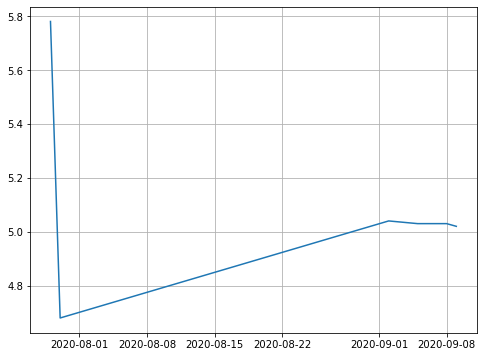

In [ ]:
# 시각화 하기
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(tmp['date'], tmp['point'])
plt.grid()
plt.show()

#### 영화별 날짜 변환에 따른 평점 변환 확인

In [ ]:
movie_pivot = pd.pivot_table(
      movie
    , index = ['date']
    , columns=['name']
    , values=['point']
)
movie_pivot.head(1)

point                                                             \
name        1917 21 브릿지: 테러 셧다운 500일의 썸머 5일의 마중 69세 7번방의 선물 82년생 김지영 B급 며느리   
date                                                                          
2020-01-01   NaN            NaN      NaN    NaN NaN     NaN     6.69    NaN   

                              ...                                           \
name       가버나움 가장 따뜻한 색, 블루  ... 핵소 고지 행복 목욕탕 헤이트풀8 현기증 호우시절 호텔 레이크 환상의 빛   
date                          ...                                            
2020-01-01  NaN          NaN  ...   NaN    NaN   NaN NaN  NaN    NaN   NaN   

                                      
name       흑집사 : 북 오브 더 아틀란틱  히트 히트맨  
date                                  
2020-01-01               NaN NaN NaN  

[1 rows x 392 columns]

In [ ]:
movie_pivot.columns

MultiIndex([('point',              '1917'),
            ('point',    '21 브릿지: 테러 셧다운'),
            ('point',          '500일의 썸머'),
            ('point',            '5일의 마중'),
            ('point',               '69세'),
            ('point',           '7번방의 선물'),
            ('point',          '82년생 김지영'),
            ('point',            'B급 며느리'),
            ('point',              '가버나움'),
            ('point',      '가장 따뜻한 색, 블루'),
            ...
            ('point',             '핵소 고지'),
            ('point',            '행복 목욕탕'),
            ('point',             '헤이트풀8'),
            ('point',               '현기증'),
            ('point',              '호우시절'),
            ('point',            '호텔 레이크'),
            ('point',             '환상의 빛'),
            ('point', '흑집사 : 북 오브 더 아틀란틱'),
            ('point',                '히트'),
            ('point',               '히트맨')],
           names=[None, 'name'], length=392)

In [ ]:
# 멀티 인덱스에서 하나 날리는 법 droplevel() 지우면서 지운놈을 반환한다. 그래서 변수에 덮어써줘야 지운 애가 컬럼즈가 된다.
movie_pivot.columns = movie_pivot.columns.droplevel()

In [ ]:
movie_pivot.columns

Index(['1917', '21 브릿지: 테러 셧다운', '500일의 썸머', '5일의 마중', '69세', '7번방의 선물',
       '82년생 김지영', 'B급 며느리', '가버나움', '가장 따뜻한 색, 블루',
       ...
       '핵소 고지', '행복 목욕탕', '헤이트풀8', '현기증', '호우시절', '호텔 레이크', '환상의 빛',
       '흑집사 : 북 오브 더 아틀란틱', '히트', '히트맨'],
      dtype='object', name='name', length=392)

In [ ]:
movie_pivot['1917']

date
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
              ..
2020-09-11   NaN
2020-09-12   NaN
2020-09-13   NaN
2020-09-14   NaN
2020-09-15   NaN
Name: 1917, Length: 259, dtype: float64

In [ ]:
import platform as pf
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']= False

if pf.system()== 'Darwin':
    rc('font', family='AppleGothic') # Mac에서 한글 사용 가능
elif pf.system()=='Windows':
    path = 'c:/Windows\Fonts\malgun.ttf'     # 윈도우 한글 글꼴 경로 설정
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('지원하지 않는 운영체제입니다')

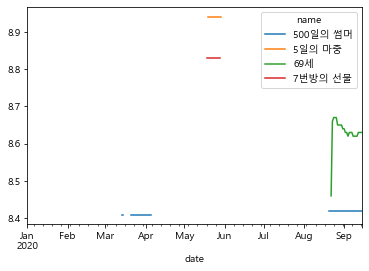

In [ ]:
# chart 그리기
movie_pivot.plot(
    y=['500일의 썸머','5일의 마중','69세','7번방의 선물']
    ,figsize=(6,4)
)


In [ ]:
# 주말 제외한 날짜만 뽑으려면 freq ='B' Business day
# 참고 : https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases
date = pd.date_range('2020-09-01','2020-11-15', freq = 'B')
date

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13'],
              dtype='datetime64[n